# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

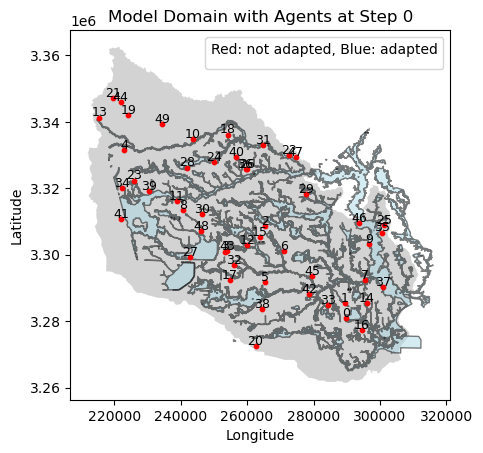

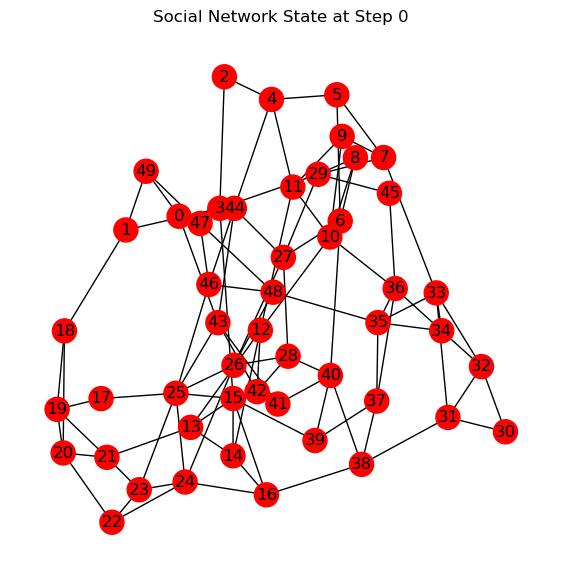

<Figure size 1000x600 with 0 Axes>

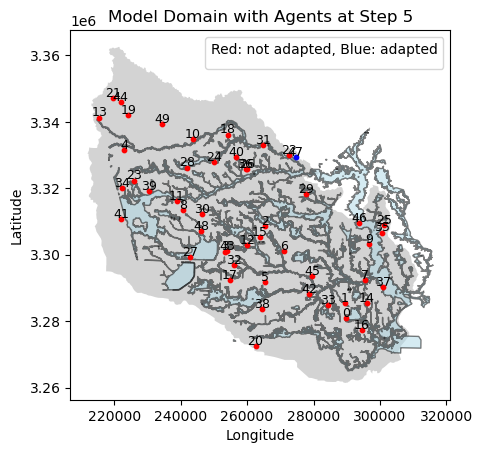

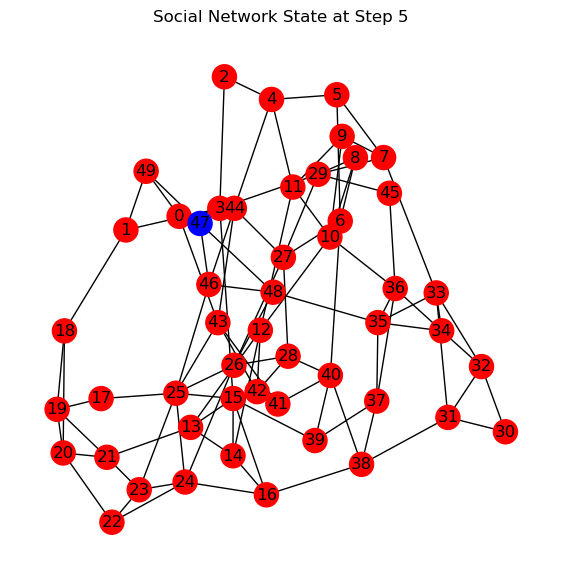

<Figure size 1000x600 with 0 Axes>

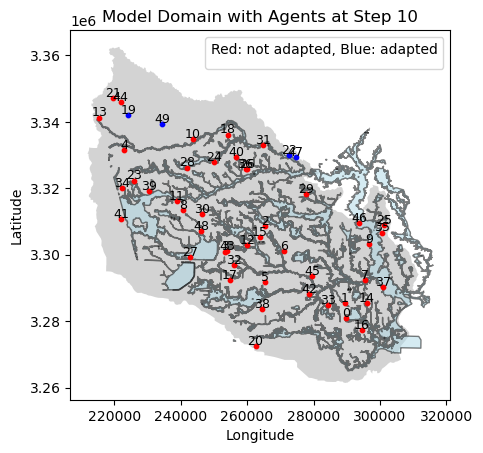

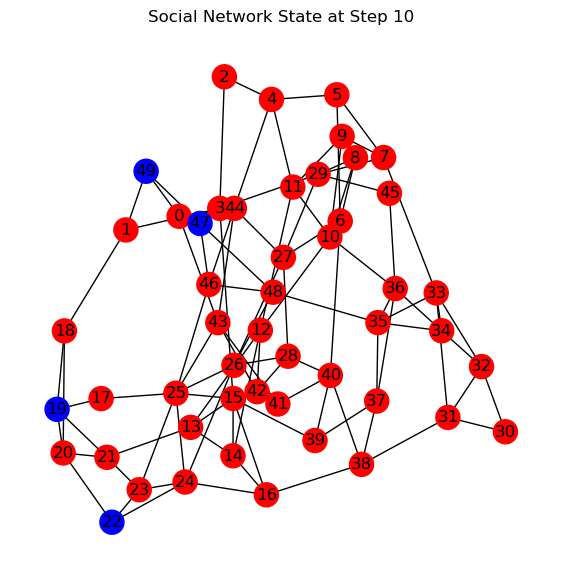

<Figure size 1000x600 with 0 Axes>

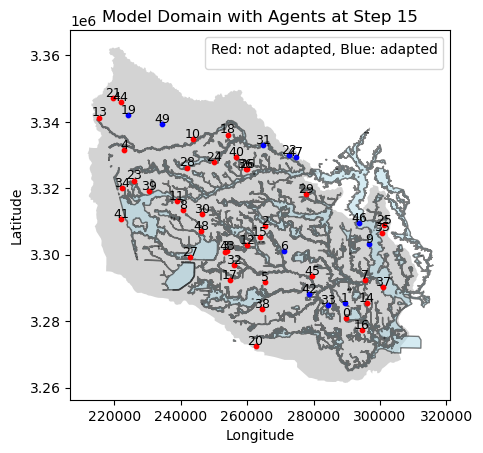

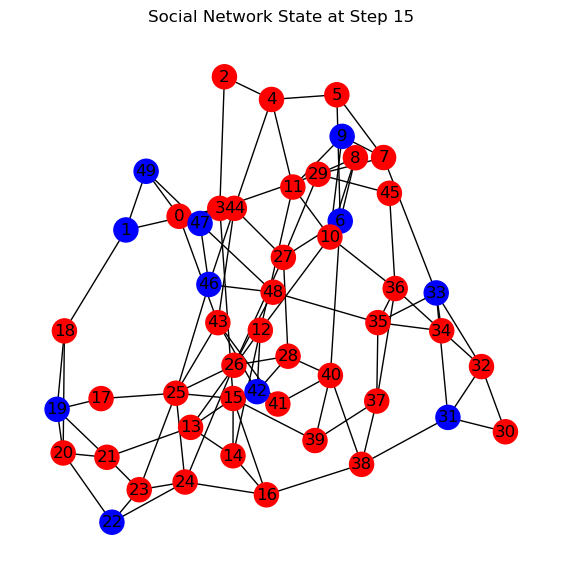

<Figure size 1000x600 with 0 Axes>

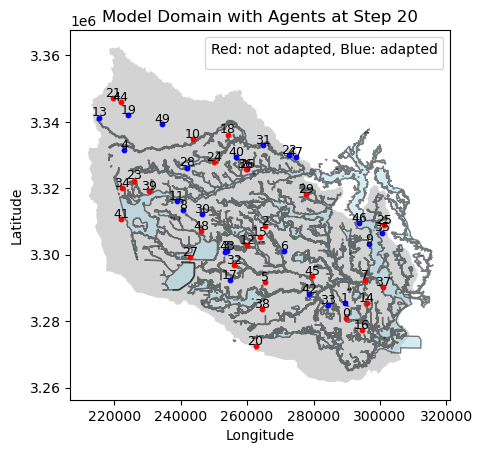

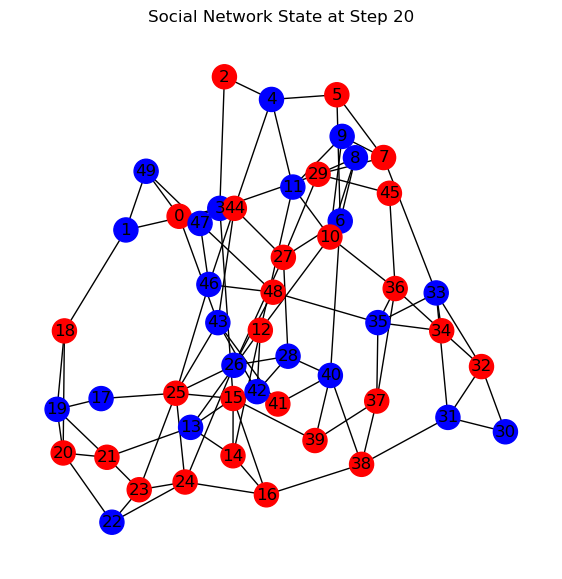

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry
agent_data['Age'].describe()
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.484639              0.521828          0.484787   
     1                   0.735231              0.594598          0.485815   
     2                   2.572495              0.813275          2.436800   
     3                   0.556818              0.546069          0.350867   
     4                   0.000000              0.000000          0.000000   
     5                   0.938603              0.637237          1.126272   
     6                   0.940859              0.637656          0.564226   
     7                   0.266492              0.417407          0.140777   
     8                   0.793343              0.607880          0.408371   
     9                   1.077439              0.661323          0.847912   
     10                  0.404453              0.490249          0.222910   
     11                  1.035019              0.654310          0.786755   
     12                  1.135641              0.670509          0.641223   
     13                  1.025909              0.652766          0.603878   
     14                  0.000000              0.000000          0.000000   
     15                  1.618847              0.732407          1.396895   
     16                  0.407151              0.491410          0.253401   
     17                  1.843830              0.755128          2.120320   
     18                  0.000000              0.000000          0.000000   
     19                  1.192955              0.679105          0.808739   
     20                  0.000000              0.000000          0.000000   
     21                  0.275337              0.423108          0.218986   
     22                  6.846558              1.000000          3.752893   
     23                  0.324055              0.451553          0.356567   
     24                  0.464649              0.514474          0.271174   
     25                  0.233515              0.394343          0.181398   
     26                  0.427528              0.499936          0.428343   
     27                  2.885366              0.833315          1.616277   
     28                  1.121964              0.668393          0.742780   
     29                  0.000000              0.000000          0.000000   
     30                  2.439087              0.803978          1.923801   
     31                  8.350107              1.000000          5.311290   
     32                  0.630369              0.567731          0.420090   
     33                  0.746132              0.597168          0.758277   
     34                  0.248985              0.405543          0.262976   
     35                  0.350096              0.465049          0.355345   
     36                  0.261089              0.413831          0.248132   
     37                  0.209263              0.375197          0.186885   
     38                  0.412291              0.493600          0.478666   
     39                  0.000000              0.000000          0.000000   
     40                  0.479431              0.519942          0.273877   
     41                  0.443020              0.506151          0.354048   
     42                  0.743648              0.596586          0.670323   
     43                  2.400478              0.801192          1.758243   
     44                  0.247963              0.404825          0.180589   
     45                  0.000000              0.000000          0.000000   
     46                  1.123647              0.668655          0.631753   
     47                  6.497501              1.000000          7.401973   
     48                  0.000000              0.000000          0.000000   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

In [3]:
import numpy as np

In [4]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Costs over Time')

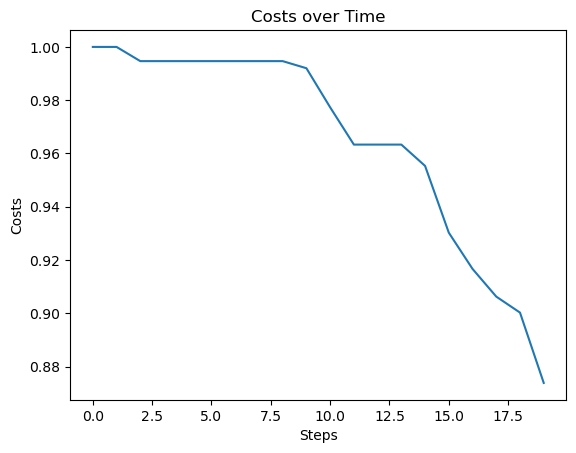

In [5]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

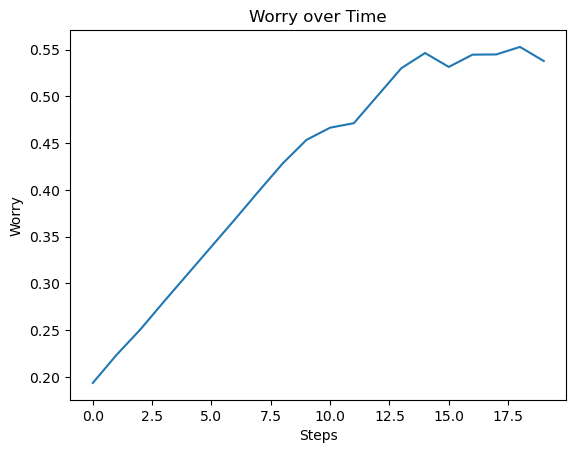

In [6]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

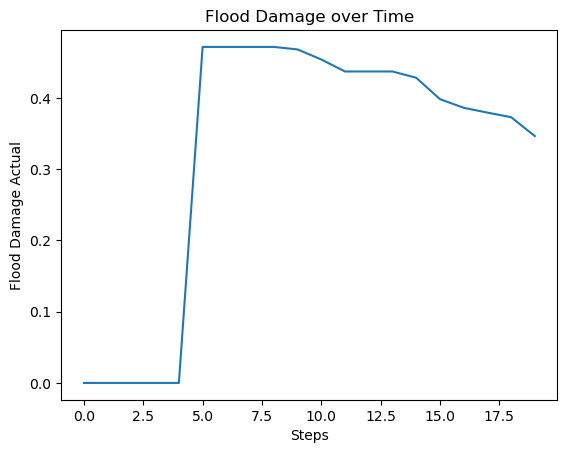

In [7]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

Text(0.5, 1.0, 'Flood measurement active (Step10)')

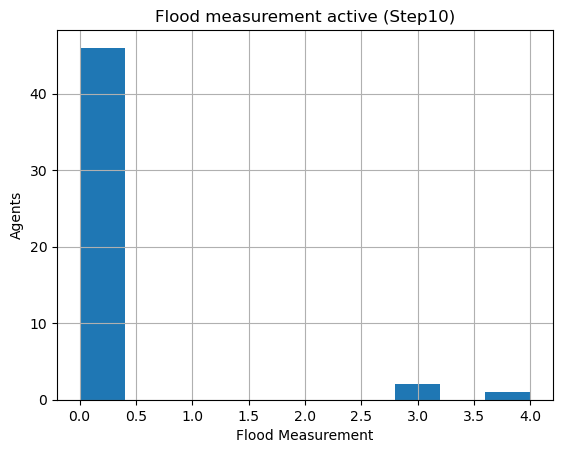

In [8]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

<Axes: xlabel='Step'>

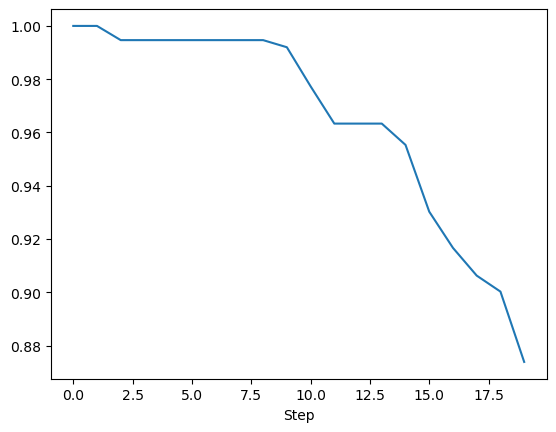

In [9]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [10]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.484639              0.521828          0.484787   
     1                   0.735231              0.594598          0.485815   
     2                   2.572495              0.813275          2.436800   
     3                   0.556818              0.546069          0.350867   
     4                   0.000000              0.000000          0.000000   
     5                   0.938603              0.637237          1.126272   
     6                   0.940859              0.637656          0.564226   
     7                   0.266492              0.417407          0.140777   
     8                   0.793343              0.607880          0.408371   
     9                   1.077439              0.661323          0.847912   
     10                  0.404453              0.490249          0.222910   
     11                  1.035019              0.654310          0.786755   
     12                  1.135641              0.670509          0.641223   
     13                  1.025909              0.652766          0.603878   
     14                  0.000000              0.000000          0.000000   
     15                  1.618847              0.732407          1.396895   
     16                  0.407151              0.491410          0.253401   
     17                  1.843830              0.755128          2.120320   
     18                  0.000000              0.000000          0.000000   
     19                  1.192955              0.679105          0.808739   
     20                  0.000000              0.000000          0.000000   
     21                  0.275337              0.423108          0.218986   
     22                  6.846558              1.000000          3.752893   
     23                  0.324055              0.451553          0.356567   
     24                  0.464649              0.514474          0.271174   
     25                  0.233515              0.394343          0.181398   
     26                  0.427528              0.499936          0.428343   
     27                  2.885366              0.833315          1.616277   
     28                  1.121964              0.668393          0.742780   
     29                  0.000000              0.000000          0.000000   
     30                  2.439087              0.803978          1.923801   
     31                  8.350107              1.000000          5.311290   
     32                  0.630369              0.567731          0.420090   
     33                  0.746132              0.597168          0.758277   
     34                  0.248985              0.405543          0.262976   
     35                  0.350096              0.465049          0.355345   
     36                  0.261089              0.413831          0.248132   
     37                  0.209263              0.375197          0.186885   
     38                  0.412291              0.493600          0.478666   
     39                  0.000000              0.000000          0.000000   
     40                  0.479431              0.519942          0.273877   
     41                  0.443020              0.506151          0.354048   
     42                  0.743648              0.596586          0.670323   
     43                  2.400478              0.801192          1.758243   
     44                  0.247963              0.404825          0.180589   
     45                  0.000000              0.000000          0.000000   
     46                  1.123647              0.668655          0.631753   
     47                  6.497501              1.000000          7.401973   
     48                  0.000000              0.000000          0.000000   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

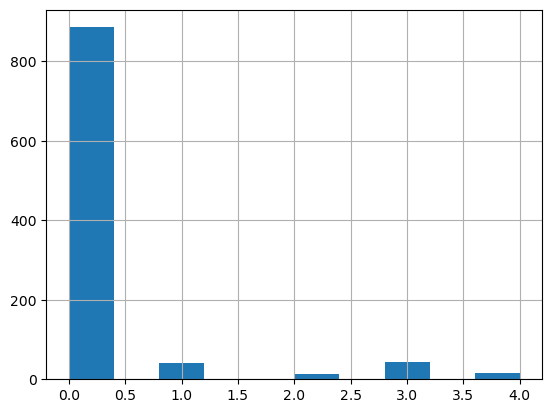

In [11]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [12]:
agent_data['FriendsCount']

Step  AgentID
0     0          3
      1          3
      2          2
      3          4
      4          4
                ..
19    45         2
      46         4
      47         3
      48         4
      49         3
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

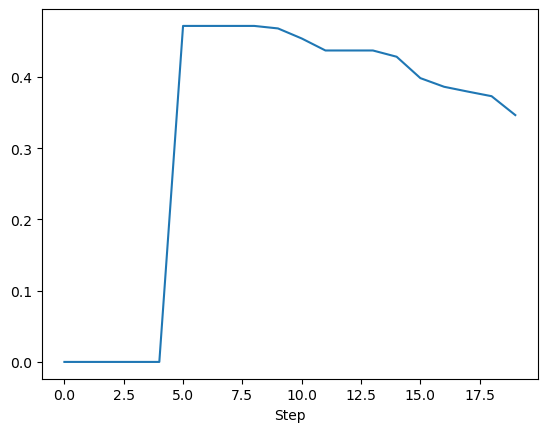

In [13]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

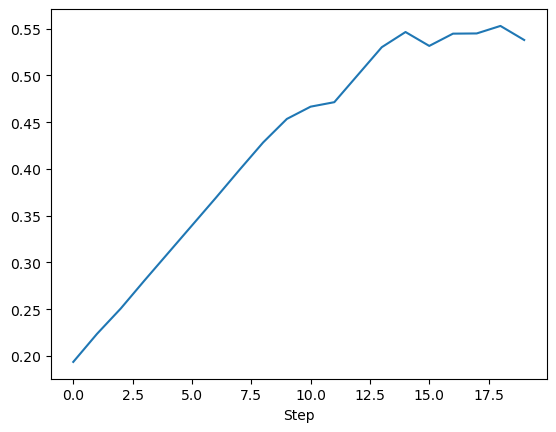

In [14]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [15]:
agent_data.groupby(by='Step')['Self_Investment'].mean()
agent_data.

SyntaxError: invalid syntax (2309412609.py, line 2)

In [ ]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.004834292863336386

In [ ]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.03889760421828706

In [ ]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.07731505800659685

In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,8
2,11
3,14
4,18
5,23
6,27
7,31
8,33
9,35
